In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../results.csv')
print(df.columns)
#df['objective'] = -df['objective'].astype(float)

Index(['p:activation', 'p:batch_size', 'p:hidden_dim', 'p:kernel_size', 'p:lr',
       'p:num_layers', 'objective', 'job_id', 'm:timestamp_submit',
       'm:timestamp_gather', 'm:timestamp_start', 'm:timestamp_end',
       'm:train_losses', 'm:val_losses'],
      dtype='object')


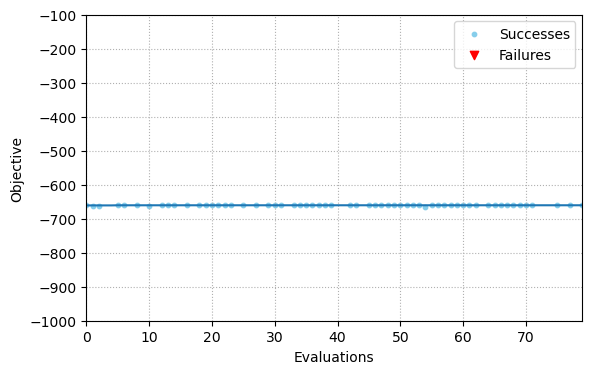

In [4]:
from deephyper.analysis.hpo import plot_search_trajectory_single_objective_hpo
fig, ax = plt.subplots()
ax.set_box_aspect(1/1.62)
ax.set_ylim(-1000, -100)
ax.grid(linestyle='dotted')
plot_search_trajectory_single_objective_hpo(df, ax=ax)
fig.savefig('../../docs/updates/figs/HPO-searches.png', dpi=500, bbox_inches='tight')

In [12]:
# print out the best config
import ast
import re
print(df['objective'])
df = df[df['objective']!='F']
print(df)

assert False



df_sorted = df.sort_values('objective')

train_loss = np.asarray(ast.literal_eval(df_sorted.iloc[-1]['m:train_losses']))

val_loss = df_sorted.iloc[-1]['m:val_losses']
pattern = re.compile(r'array\(([\d.]+), dtype=float32\)')
matches = pattern.findall(val_loss)

# Convert the matches to a list of floats
val_loss = [float(match) for match in matches]



Empty DataFrame
Columns: [p:activation, p:batch_size, p:hidden_dim, p:kernel_size, p:lr, p:num_layers, objective, job_id, m:timestamp_submit, m:timestamp_gather, m:timestamp_start, m:timestamp_end, m:train_losses, m:val_losses]
Index: []


AssertionError: 

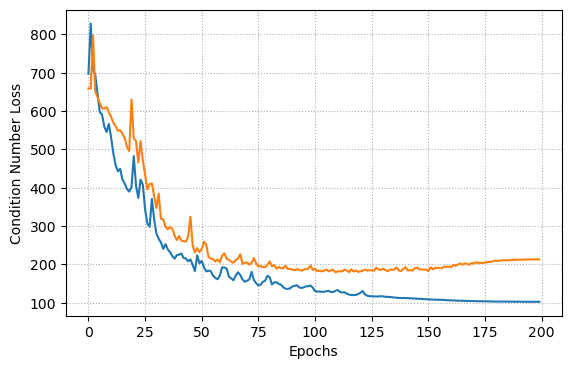

In [46]:
# plot the training and validation
fig, ax = plt.subplots()
ax.set_box_aspect(1/1.62)
ax.plot(train_loss)
ax.plot(val_loss)
ax.grid(linestyle='dotted')
ax.set_xlabel('Epochs')
ax.set_ylabel('Condition Number Loss')
fig.savefig('../../docs/updates/figs/best-hpo-train-curve.png', dpi=500, bbox_inches='tight')
